# Introduction to neural network classification with TensorFlow

Here we will learn how to write neural networks for classification problems.

those can be:-
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
%tensorflow_version 2.x 

In [3]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
#the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand rn,  lets visualize it!

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


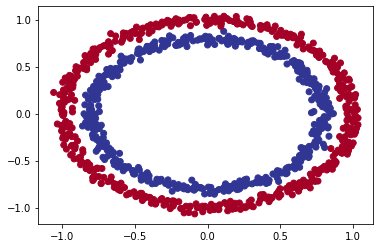

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
#Check the shapes of x and y

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
#How many samples we working with
len(X), len(y)

(1000, 1000)

## Steps in modelling 

1. Create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. Tweak
6.Evaluate...


In [10]:
import tensorflow as tf

tf.random.set_seed(42)

#create model
model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(1)                              
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
#Lets try to improve it by training for longer

model_1.fit(X,y, epochs=50,verbose=1)


Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4890
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/50
32/32 [

Since we're working on a binary classification problem and our model is getting an accuracy of 50% it is practically guessing,

lets try to add 1 extra layer

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
 tf.keras.layers.Dense(1),
 tf.keras.layers.Dense(1)                              
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

## Improving our model



In [13]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),  
  tf.keras.layers.Dense(2)                      
 ])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 3.3286 - accuracy: 0.4540
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 3.1575 - accuracy: 0.4600
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 2.9713 - accuracy: 0.4620
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 2.9666 - accuracy: 0.4580
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 2.9586 - accuracy: 0.4570
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 2.9290 - accuracy: 0.4550
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 2.9133 - accuracy: 0.4590
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 2.8930 - accuracy: 0.4610
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 2.8807 - accuracy: 0.4640
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 2.8420 - accuracy: 0.4640
Epoch 11/50
32/32 [

## Lets make a function to plot the predicions of our model

first we will :-
* take in a trained model, the featurs, and the labels
* Create a meshgrid of the different X values
* Make the predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [14]:
import numpy as np

def plot_decision_boundry(model, X, y):
  """
  Plots the decisions of predicted values of X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification...


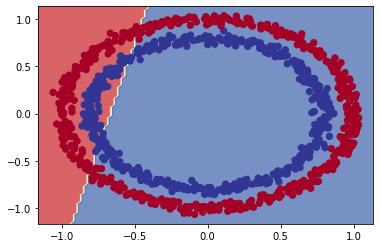

In [15]:
#check the predictions

plot_decision_boundry(model_3, X=X, y=y)

In [16]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#Split

x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(x_reg_train,y_reg_train,epochs=50)

Epoch 1/50


ValueError: ignored

In [ ]:
y_regression

WAIT... we made our model to use it on a binary crossentropy problem

it errored when we used it on a regression problem

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),  
  tf.keras.layers.Dense(1)                      
 ])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(x_reg_train,y_reg_train,epochs=50)

In [ ]:
#make pred

y_reg_preds = model_4.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(y_reg_preds, y_reg_preds, c="r", label="predictions")


#OKAAAYYY I WROTE SOMETHING WRONG, IDK, JUST DONT LOOK AT THIS

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#Create model

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="linear"),    #you can also write, activation = tf.keras.activation.linear

])

#Compile our model

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_5.fit(X, y, epochs=100)

In [ ]:
X, y

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#Chedk the decision boundry or our latest model
plot_decision_boundry(model_5,X=X,y=y)

Lets to tryo build model with non linear activation function

In [ ]:
# set random seed
tf.random.set_seed(42)

#Create model with a non-linear activation
model_6=tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu")                             
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=100)

In [ ]:
#Time to MAKE IT BETTER 
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="relu"),  
  tf.keras.layers.Dense(1,activation="sigmoid")                      
 ])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_7.fit(X,y,epochs=200)

In [ ]:
#Ecvaluate the model

model_7.evaluate(X,y)

In [ ]:
plot_decision_boundry(model_7,X,y)

In [ ]:
len(X)

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")                            
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50)


In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1,)
plt.title("train")
plot_decision_boundry(model, X=X_test, y=y_test)

## Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()


## Finding the best learning rate

To find the ideal lr we're going to use the following steps:
* A learning rate *callback* - you can of it as an extra piece of functionality while its training.
* A modified loss curve plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid"),                              
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Createa learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

In [ ]:
model_9.evaluate(X_test,y_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs");

In [ ]:
#plot the learning rate vs the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid"),                              
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=10**-2),
                metrics=["accuracy"])

#Createa learning rate callback

history = model_9.fit(X_train, y_train, epochs=20)

In [ ]:
model_9.evaluate(X_test,y_test)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundry(model_9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundry(model_9, X=X_test, y=y_test)
plt.show()

## More classification evaluation methiods

along side visualizing the resulsts of the model as much as possilbe, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* confusion matrix
* Accuracy
* Precision - more means less false positives
* Recall - less false negatives
* f1-score - combination of precision and recall
* Classification report(from scikit-learn)

In [ ]:
#Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss: {loss}")
print(f"Model accuracy: {(accuracy * 100):.2f}%")

How about a confusion matrix?

In [ ]:
from sklearn.metrics import confusion_matrix

#make preds
y_preds = model_9.predict(X_test)

#confusion_matrix(y_test, y_preds)

In [ ]:
y_test

In [ ]:
y_preds

OOps, looks like our prediction array jas come out in prediction probabilty form... the standard output from the sigmoid activation functions

In [ ]:
#Convert our y_preds to binary format
y_preds = tf.round(y_preds)

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
#LETS MAKE IT PRETTIER
#we will use sklearns plot_confusion_matrix, but we will change it a little bit so it works with tensorflow

import itertools

figsize = (10,10)

# Create the confusion matrix just like above
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0] #2

#Lets pretify it
fig, ax = plt.subplots(figsize=figsize)
#Create a mtarix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion_matrix",
       xlabel="predictedLabel",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min()) /2. #50.5
#set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
  horizontalalignment="center",
  color="white" if cm[i,j] > threshold else "black",
  size=15)

In [ ]:
def plot_confusion_matrix(y_test, y_preds, n_classes):
  figsize = (10,10)

  # Create the confusion matrix just like above
  cm = confusion_matrix(y_test, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  #n_classes = cm.shape[0] #2

  #Lets pretify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a mtarix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion_matrix",
        xlabel="predictedLabel",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  threshold = (cm.max() + cm.min()) /2. #50.5
  #set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  #plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i,j] > threshold else "black",
    size=15)

In [ ]:
plot_confusion_matrix(y_test, y_preds, cm.shape[0])


# Working with a larger example!!!

When you have more than 2 classes, its known as multi-class clasification

to practice this, we're goiung to build a model to classify images of items of clothing

In [ ]:
#*

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been split

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
#check shape of single example
train_data[0].shape, train_labels[0].shape

In [ ]:
#*

#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
#Check out samples label
train_labels[0]

In [ ]:
#*

#Create a list of the classes so we can index to them
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(classes)

In [ ]:
#plot an example image with its label
plt.imshow(train_data[25], cmap=plt.cm.binary)
plt.title(classes[train_labels[25]])

In [ ]:
#plot multiple random images from Mnist
import random
#random_index = np.random.randrange(0,60000)

plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  random_index = random.randrange(0,len(train_data))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[random_index]])
  plt.axis(False)

## Building a multi-class classification model

for this we can use a similar model as our binary NN

* input shape = 28x28
* output shape = 10 (1 per class)
* loss function = categorical crossentropy
  if ur labels are 1 hot encoded, use CategoricalCrossentropy(), if ur labels are integer form(which it is in our case), use SparseCategoricalCrossentropy()
* output activation = softmax

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_11.fit(train_data, train_labels, epochs=10,  validation_data=(test_data, test_labels))

In [ ]:
model_11.summary()

Neural networks prefer to be scaled(or normalize), this means they like to have numbers in the tensors between 0 & 1.

In [ ]:
train_data.min(), train_data.max()

In [ ]:
# We can normalze our training and testing data between 0 & 1 by divind by the max()

train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

train_data_norm.min(), train_data_norm.max()

In [ ]:
# Now our data is nnormalized, lets build a model to find patterns in it

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10,  validation_data=(test_data_norm, test_labels))

> Neural networks tend to prefer data in numerical form as well as scaled/normalized.

doing that, we can clearly see that out val_accuracy hass shot up to 80% from the previous 35%

In [ ]:
import pandas as pd
#plot non-normalized data loss curve
pd.DataFrame(history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

## Finding the ideal lr

In [ ]:


tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_12.fit(train_data_norm, train_labels, epochs=40, callbacks=[lr_scheduler] validation_data=(test_data_norm, test_labels))

SORRY I GOT TOO LAZY HAVING TO LOOK FOR SPECIFIC CODE BLOCKS TO RUN, AND THERE WAS ONLY 1 HOUR LEFT ON THE COURSE 